In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
DF = pd.read_csv('18.09_1M.csv')

C:\Users\1111\AppData\Local\Temp\ipykernel_14964\3917063425.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('18.09_1M.csv')


In [3]:
DF

,EventDate,date,ssp_name,ci_image_cat,ci_text_cat,iab_text_cat,google_creative_id,google_creative_name,google_line_item_id,google_line_item_name,...,nbr_bs_image_unsafe,nbr_ad_request_error,nbr_ad_not_received,nbr_line_item_not_found,nbr_line_item_stopped,nbr_line_item_expired,nbr_creative_request_error,nbr_creative_parser_error,nbr_details,predictor_weight
0,2023-09-17,2023-09-17T18:11:11+03:00,astralab,['0'],['11'],['211'],16940140384,vk_scroller_girl_sep23,1694017004,[MSM]-МСК/СПБ_T:Расш,...,0,0,0,0,0,0,0,0,NaN,0.318596
1,2023-09-17,2023-09-17T18:11:12+03:00,astralab,['0'],['11'],['211'],16945275311,tank_brand_code_sep23,1694530330,[VA]-МСК/СПБ_T: smartpixel,...,0,0,0,0,0,0,0,0,NaN,0.193778
2,2023-09-17,2023-09-17T18:11:12+03:00,astralab,['0'],"['1', '11']",['213'],16940983634,vk_avmfix_sep23_2Vtzqvp6XxC,1694093779,[VM]-МСК/СПБ_T: Расш,...,0,0,0,0,0,0,0,0,NaN,0.191926
3,2023-09-17,2023-09-17T18:11:12+03:00,astralab,['0'],"['1', '11', '220']",['206'],16939318327,ecco_ic_sep23,1694182300,[VM}-МСК/СПБ_T:Расш CTR,...,0,0,0,0,0,0,0,0,NaN,0.352360
4,2023-09-17,2023-09-17T18:11:12+03:00,astralab,"['100363', '35084', '38422', '37783', '134825'...",['11'],['206'],16908920128,iis_contrctbx_aug_23,1690893426,[IA]-RF:Image cat,...,0,0,0,0,0,0,0,0,NaN,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023-09-17,2023-09-17T14:57:26+03:00,astralab,['0'],"['1', '11']",['227'],16946229825,vk_scroller_ic_boy_sep23,1694626112,[VM]-МСК/СПБ_T:Расш,...,0,0,0,0,0,0,0,0,NaN,0.232102
999996,2023-09-17,2023-09-17T14:57:26+03:00,astralab,['0'],['11'],['210'],16944445301,LatgBn3S5_other_ICV,1694447353,[VM]Other_T: широкая,...,0,0,0,0,0,0,0,0,NaN,0.190292
999997,2023-09-17,2023-09-17T14:57:26+03:00,astralab,['0'],"['11', '213']",['227'],16946931252,askona_ac_sep23_LatgBhT1P_300x600,1694696519,[BM]-Мск_Т:Расш.,...,0,0,0,0,0,0,0,0,NaN,0.161270
999998,2023-09-17,2023-09-17T14:57:26+03:00,astralab,['0'],"['1', '11']",['227'],16940996815,LatgBU3Ve_KK_AstraSmart_ABS_sep-oct23,1694102802,[VM]-MSK_T: широкая,...,0,0,0,0,0,0,0,0,NaN,0.100000


In [4]:
DF = DF.drop_duplicates()
DF = DF.reset_index(drop=True)

In [5]:
DF.columns

Index(['EventDate', 'date', 'ssp_name', 'ci_image_cat', 'ci_text_cat',
       'iab_text_cat', 'google_creative_id', 'google_creative_name',
       'google_line_item_id', 'google_line_item_name',
       ...
       'nbr_bs_image_unsafe', 'nbr_ad_request_error', 'nbr_ad_not_received',
       'nbr_line_item_not_found', 'nbr_line_item_stopped',
       'nbr_line_item_expired', 'nbr_creative_request_error',
       'nbr_creative_parser_error', 'nbr_details', 'predictor_weight'],
      dtype='object', length=103)

In [6]:
df = DF[['date','google_creative_name',
       'google_line_item_name',
       'google_order_name',        
       'publisher_place_type',
       'publisher_place_price',
       'publisher_website', 'visitor_browser',
       'visitor_city', 'visitor_country', 'visitor_region', 'visitor_device',  
        'event_click']]

In [7]:
df.isnull().sum()

date                      0
google_creative_name      0
google_line_item_name     0
google_order_name         0
publisher_place_type      0
publisher_place_price     0
publisher_website         0
visitor_browser           0
visitor_city             97
visitor_country           0
visitor_region           97
visitor_device            0
event_click               0
dtype: int64

##### заполним пропуски модами:

In [8]:
values = {"visitor_region": df.visitor_region.mode()[0]}
df = df.fillna(value=values)
values2 = {"visitor_city": df.visitor_city.mode()[0]}
df = df.fillna(value=values2)

##### добавим день недели и час

##### столбцы с типом данных object закодируем

In [9]:
def label_encoder(l):
    le = preprocessing.LabelEncoder()
    le.fit(l)
    print(le.classes_)
    return(le.transform(l))

In [10]:
#df.hour = label_encoder(df.hour)
df.google_creative_name = label_encoder(df.google_creative_name)
df.google_line_item_name = label_encoder(df.google_line_item_name)
df.google_order_name = label_encoder(df.google_order_name)
df.publisher_place_type = label_encoder(df.publisher_place_type)
df.publisher_website = label_encoder(df.publisher_website)
df.visitor_browser = label_encoder(df.visitor_browser)
df.visitor_city = label_encoder(df.visitor_city)
df.visitor_country = label_encoder(df.visitor_country)
df.visitor_region = label_encoder(df.visitor_region)
df.visitor_device = label_encoder(df.visitor_device)

[' LatgC6sAL_vklad_sep-oct23_IIS_43%'
 ' aquaoptic_clix_aug23_text3_160x600 (Copy)'
 ' aquaoptic_clix_aug23_text3_240x400 (Copy)'
 ' aquaoptic_clix_aug23_text3_300x100 (Copy)'
 ' aquaoptic_clix_aug23_text3_300x250 (Copy)'
 ' aquaoptic_clix_aug23_text3_300x300 (Copy)'
 ' aquaoptic_clix_aug23_text3_300x600 (Copy)'
 ' aquaoptic_clix_aug23_text3_300x75 (Copy)'
 ' aquaoptic_clix_aug23_text3_320x100 (Copy)'
 ' aquaoptic_clix_aug23_text3_320x480 (Copy)'
 ' aquaoptic_clix_aug23_text3_336x280 (Copy)'
 ' aquaoptic_clix_aug23_text3_728x90 (Copy)'
 ' glenmark_ii_aug23_40%_LatgC8bgQ_NEW' ' pochta_jb_aug23_3_160x600'
 ' pochta_jb_aug23_3_300x250' '06.09_tank300_abs_sep23_LatgBg4eQ'
 '06.09_tank300_ii_sep23_LatgBg4eQ' '06.09_tank500_abs_sep23_LatgBi5Xz'
 '06.09_tank500_ii_sep23_LatgBi5Xz' '1001 тур Nirvana AstraTube ic 30s'
 '2408_m6_ii_aug23_60%_LatgBohqs' 'ABS_Murmansk_Sep23' 'ABS_SEP23_ARH'
 'ABS_SPB_sep23' 'ABS_sep23' 'ABS_sep23_YaBoginya' 'AT_Cabbie15_Sep23'
 'AT_Cabbie30_Sep23' 'AT_Mechanic15_s

In [11]:
df

,date,google_creative_name,google_line_item_name,google_order_name,publisher_place_type,publisher_place_price,publisher_website,visitor_browser,visitor_city,visitor_country,visitor_region,visitor_device,event_click
0,2023-09-17T18:11:11+03:00,439,107,117,0,0.090,80,2,1269,3,52,1,0
1,2023-09-17T18:11:12+03:00,430,125,105,7,0.050,73,2,43,3,33,1,0
2,2023-09-17T18:11:12+03:00,437,161,112,8,0.100,83,17,1987,3,84,1,0
3,2023-09-17T18:11:12+03:00,305,204,8,7,0.100,85,18,1772,3,12,1,0
4,2023-09-17T18:11:12+03:00,336,43,51,10,0.100,88,2,1223,3,54,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999970,2023-09-17T14:57:26+03:00,440,162,116,7,0.083,24,2,707,3,31,1,0
999971,2023-09-17T14:57:26+03:00,172,173,81,7,0.110,83,2,1513,4,11,1,0
999972,2023-09-17T14:57:26+03:00,281,22,31,13,0.020,44,2,1390,3,77,1,0
999973,2023-09-17T14:57:26+03:00,138,157,71,7,0.090,27,2,1390,3,77,0,0


C:\Users\1111\AppData\Local\Temp\ipykernel_14964\3784235817.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df.corr()


Text(0.5, 1.05, 'Pearson correlation of Features')

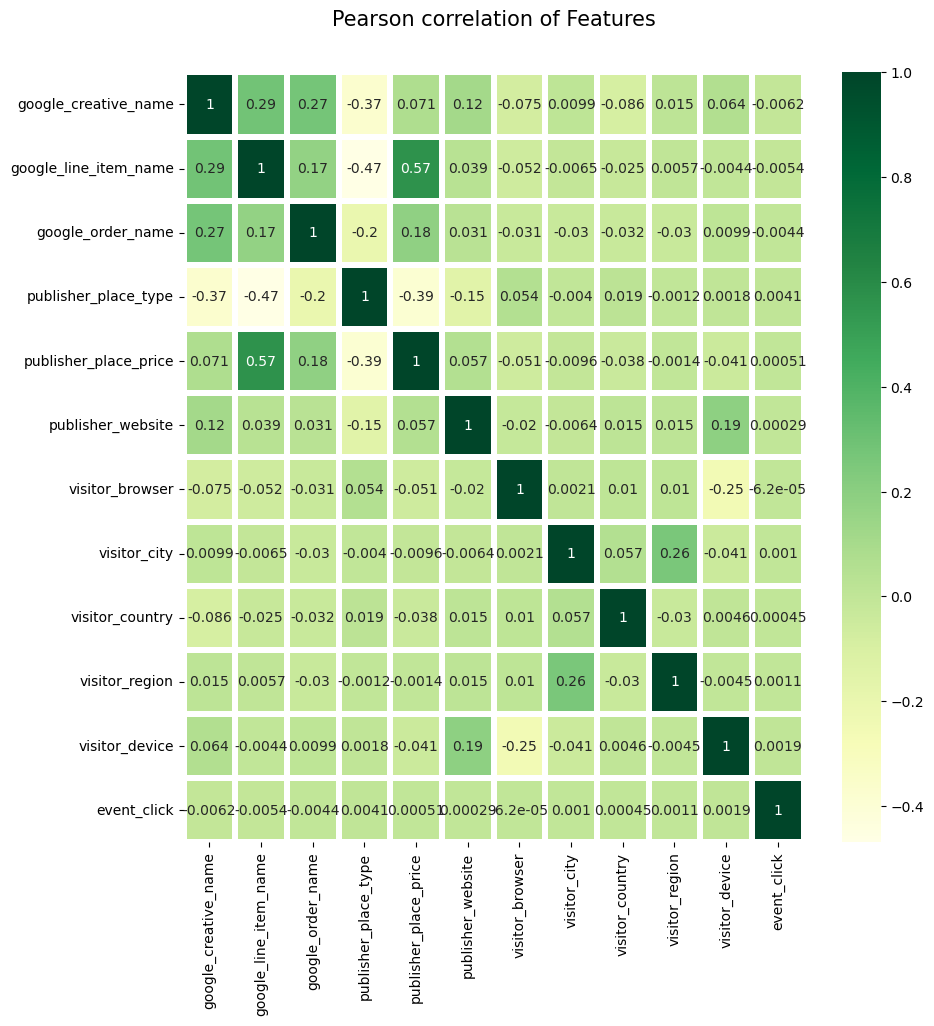

In [12]:
#df2 = df[[ 'publisher_place_name', 'publisher_place_type',
       #'publisher_place_price',
       
       #'publisher_website','hour']]
corr2 = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr2, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

##### масштабируем данные 

In [13]:
def scaler(l):
    ll = np.array(l).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(ll)
    return scaler.transform(ll)

In [14]:
#df.hour = scaler(df.hour)
df.google_creative_name = scaler(df.google_creative_name)
df.google_line_item_name = scaler(df.google_line_item_name)
df.google_order_name = scaler(df.google_order_name)
df.publisher_place_type = scaler(df.publisher_place_type)
df.publisher_website = scaler(df.publisher_website)
df.visitor_browser = scaler(df.visitor_browser)
df.visitor_city = scaler(df.visitor_city)
df.visitor_country = scaler(df.visitor_country)
df.visitor_region = scaler(df.visitor_region)
df.visitor_device = scaler(df.visitor_device)

In [15]:
df.describe()

,google_creative_name,google_line_item_name,google_order_name,publisher_place_type,publisher_place_price,publisher_website,visitor_browser,visitor_city,visitor_country,visitor_region,visitor_device,event_click
count,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000,999975.000000
mean,0.628670,0.576697,0.563697,0.568005,0.083075,0.511070,0.163164,0.524307,0.748541,0.542474,0.459699,0.000190
std,0.312732,0.295908,0.246878,0.231452,0.042451,0.228324,0.211954,0.265031,0.044562,0.240732,0.140692,0.013783
min,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.381375,0.350467,0.429530,0.500000,0.050000,0.398058,0.071429,0.306583,0.750000,0.407767,0.500000,0.000000
50%,0.731707,0.649533,0.644295,0.500000,0.100000,0.407767,0.071429,0.536761,0.750000,0.514563,0.500000,0.000000
75%,0.933481,0.757009,0.765101,0.714286,0.120000,0.776699,0.071429,0.723210,0.750000,0.747573,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.event_click.value_counts()

0    999785
1       190
Name: event_click, dtype: int64

In [17]:
df.columns

Index(['date', 'google_creative_name', 'google_line_item_name',
       'google_order_name', 'publisher_place_type', 'publisher_place_price',
       'publisher_website', 'visitor_browser', 'visitor_city',
       'visitor_country', 'visitor_region', 'visitor_device', 'event_click'],
      dtype='object')

##### разбиваем на выборки

In [18]:
X = df.drop(columns=['event_click','date'],axis=1)
Y = df['event_click']

In [19]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [20]:
oversample = RandomOverSampler(sampling_strategy=0.2)

In [21]:
X_over, Y_over = oversample.fit_resample(X, Y)

In [22]:
print(X_over.shape, Y_over.shape)

(1199742, 11) (1199742,)


In [23]:
Y_over.value_counts()

0    999785
1    199957
Name: event_click, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X_train.shape, X_test.shape)

(899977, 11) (99998, 11)


In [25]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [26]:
Y_pred_lr = model_lr.predict(X_test)

In [27]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
model_lr.predict_proba(X_test)[::,1]

array([0.00012582, 0.00021732, 0.00020057, ..., 0.00013873, 0.00011233,
       0.00018634])

In [29]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import PrecisionRecallDisplay

In [86]:
prec_lr = precision_score(Y_test,Y_pred_lr,average='macro')
rec_lr = recall_score(Y_test,Y_pred_lr,average='macro')
bal_acc_lr = balanced_accuracy_score(Y_test,Y_pred_lr)
g_mean_lr =  geometric_mean_score(Y_test,Y_pred_lr)
jaccard_lr = jaccard_score(Y_test,Y_pred_lr)
print('precision:',prec_lr)
print('recall:',rec_lr)
print('g_mean=',g_mean_lr)
print('bal_acc=',bal_acc_lr)
print('jaccard=',jaccard_lr)

precision: 0.499904998099962
recall: 0.5
g_mean= 0.0
bal_acc= 0.5
jaccard= 0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


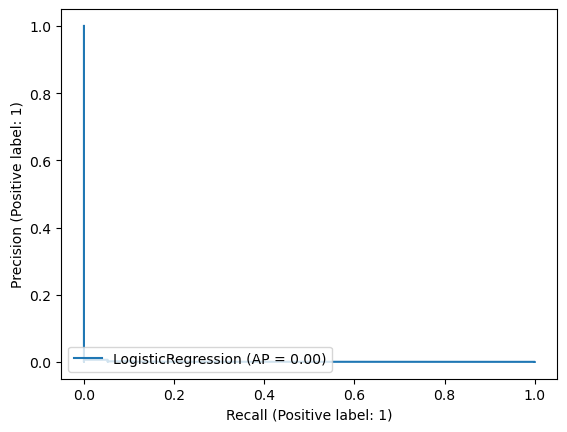

In [31]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model_lr, X_test, Y_test)
#_ = display.ax_.set_title("2-class Precision-Recall curve")

In [32]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear',probability=True)
model_svm.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [33]:
Y_pred_svm = model_svm.predict(X_test)

In [34]:
Y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
model_svm.predict_proba(X_test)[::,1]

array([0.00017782, 0.00014235, 0.00019686, ..., 0.00013122, 0.0001137 ,
       0.00012797])

In [92]:
prec_svm = precision_score(Y_test,Y_pred_svm)
rec_svm = recall_score(Y_test,Y_pred_svm)
bal_acc_svm = balanced_accuracy_score(Y_test,Y_pred_svm)
g_mean_svm =  geometric_mean_score(Y_test,Y_pred_svm)
jaccard_svm = jaccard_score(Y_test,Y_pred_svm)
print('precision:',prec_svm)
print('recall:',rec_svm)
print('g_mean=',g_mean_svm)
print('bal_acc=',bal_acc_svm)
print('jaccard=',jaccard_svm)

precision: 0.0
recall: 0.0
g_mean= 0.0
bal_acc= 0.5
jaccard= 0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred_svm)

TP = cm[1,1]
TN = cm[0,0]
FP = cm[
print(TN)
print(cm)

99979
[[99979     0]
 [   19     0]]


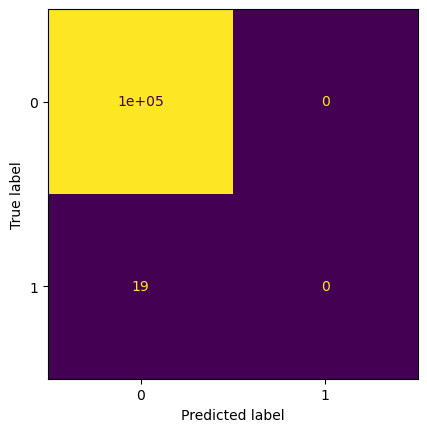

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=model_svm.classes_)
disp.plot(colorbar=False)

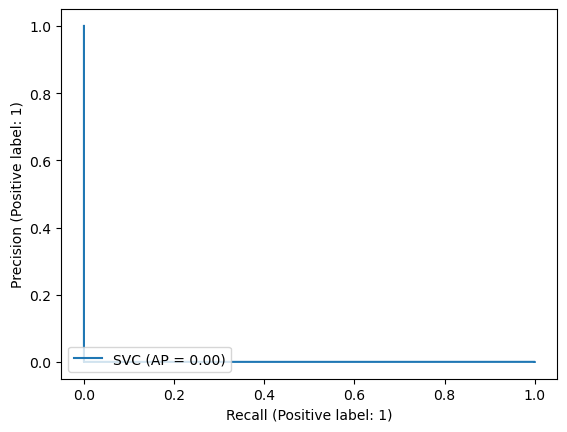

In [58]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model_svm, X_test, Y_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [55]:
Y_pred_rf = model_rf.predict(X_test)

In [60]:
prec_rf = precision_score(Y_pred_rf,Y_test,average='macro')
rec_rf = recall_score(Y_pred_rf,Y_test,average='macro')
bal_acc_rf = balanced_accuracy_score(Y_pred_rf,Y_test)
g_mean_rf =  geometric_mean_score(Y_pred_rf,Y_test,average='macro')
jaccard_rf = jaccard_score(Y_pred_rf,Y_test, average="macro")
print('precision:',prec_rf)
print('recall:',rec_rf)
print('g_mean=',g_mean_rf)
print('bal_acc=',bal_acc_rf)
print('jaccard=',jaccard_rf)

precision: 0.5
recall: 0.499904998099962
g_mean= 0.499904998099962
bal_acc= 0.999809996199924
jaccard= 0.499904998099962


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


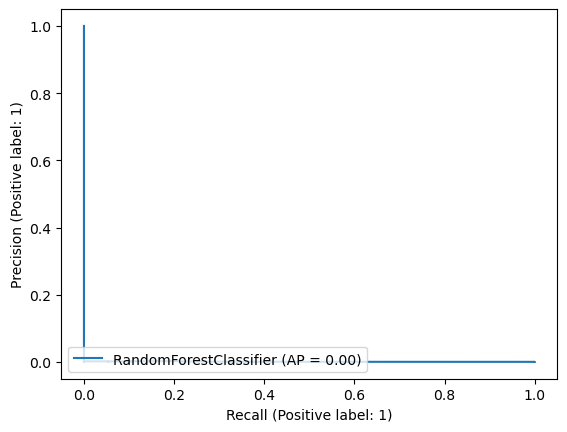

In [57]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model_rf, X_test, Y_test)
#_ = display.ax_.set_title("2-class Precision-Recall curve")

In [38]:
import keras
from keras import preprocessing
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from tensorflow.keras import layers
import tensorflow as tf

In [39]:
from keras import backend as K
def weighted_binary_crossentropy(y_true, y_pred):
    weight = K.variable([0.5, 0.5])  # Adjust these values as needed
    y_true = K.cast(y_true, y_pred.dtype)
    return K.mean(K.binary_crossentropy(y_true, y_pred) * K.sum(weight * y_true, axis=-1), axis=-1)

In [43]:
inputs = keras.Input(shape=(11,1))
x = layers.BatchNormalization()(inputs)


x = layers.Conv1D(filters=3, kernel_size=3, padding="same", activation='relu')(x) # слой свертки
#x = layers.Dense(4, activation='relu')(x)
x = layers.Dense(2, activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model2 = keras.Model(inputs=inputs, outputs=outputs, name="classification-model")
model2.summary()

Model: "classification-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 batch_normalization_1 (Batc  (None, 11, 1)            4         
 hNormalization)                                                 
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 3)             12        
                                                                 
 dense_2 (Dense)             (None, 11, 2)             8         
                                                                 
 flatten_1 (Flatten)         (None, 22)                0         
                                                                 
 dropout_1 (Dropout)         (None, 22)                0         
                                              

In [52]:
#import tensorflow_addons as tfa
model2.compile(loss='binary_crossentropy',optimizer='sgd',metrics=[tf.keras.metrics.F1Score(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'F1Score'

In [42]:
fit_results = model2.fit(x=X_train,y=Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
22500/22500 [==============================] - 60s 3ms/step - loss: 0.0056 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0027 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
22500/22500 [==============================] - 63s 3ms/step - loss: 0.0021 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0025 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
22500/22500 [==============================] - 55s 2ms/step - loss: 0.0020 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0024 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
22500/22500 [==============================] - 50s 2ms/step - loss: 0.0020 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0024 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
22500/22500 [==============================] - 54s 2ms/step - loss: 0.0019 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0024 - val_precision: 0.0000e+00 - val

KeyboardInterrupt: 